# Social Network Analysis @ UNIPI
### 19/07/2023

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# First Half

## Exercise 1: Synthetic Models [4 points]

Let G be an ER graph with N = 12000 and p = 0.01
- What is the number of edges of G?
- Which value of m allows to generage a graph with the same N and E with the BA model?
- Which is the expected degree of the largest hub in the BA model? and the average degree in the ER?
- In which regime is the ER model?

In [2]:
n = 1200
p = 0.01

In [3]:
e = p * (n*(n-1))/2
print(f'The number of edges is {e}')

The number of edges is 7194.0


In [4]:
m = e/n
print(f'The parameter m would be {round(m)}')

The parameter m would be 6


In [5]:
#degree exponent
gamma = 3 

kmax = m * n**(1/(gamma-1))
kmax

ratio = kmax/e
print(f'the percentage of edges incident on the largest hub is {round(ratio*100, 2)}%')

avg_k = (2*e)/n 
avg_k_2 = (2*m)

print(f'the average degree is {avg_k}')

the percentage of edges incident on the largest hub is 2.89%
the average degree is 11.99


In [6]:
# regime
p < 1/n, p == 1/n, p > 1/n, p > np.log(n)/n #connected regime

if p > np.log(n)/n:
    print('The ER network would be in supercritical regime')

The ER network would be in supercritical regime


## Exercise 2: Graph Construction [6 points]

Given 13 nodes - identified with numbers - and, at most, 25 edges build a
graph such that all the following conditions hold:
- graph G has exactly 2 components;
- the clustering coefficient of nodes 5 and 9 is respectively 1/3 and 2/3
- node 10 has the lowest degree centraly
- node 8 has the highest closeness centrality
- edge (11,12) has the lowest edge betweenness
- there is a shortest path of length 3 between nodes 8 and 9


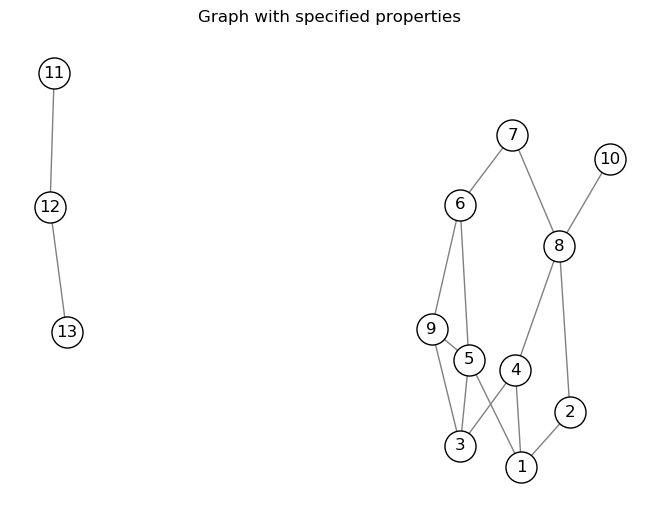

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes 1 to 13
G.add_nodes_from(range(1, 13))

# Add edges
G.add_edges_from([(5, 3), 
(10, 8),
(1, 4),
(1, 5),
(9, 6),
(4, 8),
(1, 2),
(7, 8),
(2, 8),
(3, 9),
(5, 9),
(6, 7),
(3, 4),
(5, 6),
(7, 8), 
(11, 12),
(12, 13)])

# Set the positions of nodes for visualization
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, edge_color='gray')
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color='white')
# Set edge color to red
nodes.set_edgecolor('black')

# Show the graph
plt.title('Graph with specified properties')
plt.axis('off')
plt.show()

In [8]:
nx.clustering(G, 9)

0.6666666666666666

In [9]:
nx.clustering(G, 5)

0.3333333333333333

In [10]:
sorted(nx.centrality.degree_centrality(G).items(), key = lambda x: x[1])

[(10, 0.08333333333333333),
 (11, 0.08333333333333333),
 (13, 0.08333333333333333),
 (2, 0.16666666666666666),
 (7, 0.16666666666666666),
 (12, 0.16666666666666666),
 (1, 0.25),
 (3, 0.25),
 (4, 0.25),
 (6, 0.25),
 (9, 0.25),
 (5, 0.3333333333333333),
 (8, 0.3333333333333333)]

In [11]:
sorted(nx.centrality.closeness_centrality(G).items(), key = lambda x: x[1])

[(11, 0.1111111111111111),
 (13, 0.1111111111111111),
 (12, 0.16666666666666666),
 (10, 0.28125),
 (2, 0.35526315789473684),
 (9, 0.35526315789473684),
 (3, 0.375),
 (6, 0.375),
 (7, 0.375),
 (1, 0.3970588235294118),
 (5, 0.3970588235294118),
 (4, 0.421875),
 (8, 0.421875)]

In [12]:
sorted(nx.centrality.edge_betweenness_centrality(G).items(), key = lambda x: x[1])

[((11, 12), 0.02564102564102564),
 ((12, 13), 0.02564102564102564),
 ((5, 9), 0.038461538461538464),
 ((3, 5), 0.05021367521367521),
 ((3, 9), 0.052350427350427345),
 ((6, 9), 0.052350427350427345),
 ((1, 4), 0.06303418803418802),
 ((5, 6), 0.07264957264957264),
 ((2, 8), 0.07905982905982904),
 ((1, 2), 0.08333333333333333),
 ((3, 4), 0.10256410256410256),
 ((6, 7), 0.10576923076923077),
 ((1, 5), 0.10790598290598291),
 ((8, 10), 0.11538461538461538),
 ((7, 8), 0.11858974358974358),
 ((4, 8), 0.125)]

## Exercise 3: Graph Analysis [6 points]

Given the (weighted) graph G:
- Compute the degree of each node and the average degree of the graph
- Compute its diameter;
- List all the shortest paths among the pairs (A,G), (C,F) and (D,I) Hint: it’s a weighted graph.
- Compute the closeness centrality of A, D and C;
- Compute the clustering coefficient of A, F and D;
- Write its adjacency matrix;
- Verify the presence of Eulerean and Hamiltonian cycles.

In [23]:
g = nx.Graph()
g.add_edge("a", "b", weight = 8)
g.add_edge("a", "h", weight = 9)
g.add_edge("b", "f", weight = 2)
g.add_edge("b", "i", weight = 9)
g.add_edge("c", "h", weight = 6)
g.add_edge("c", "i", weight = 2)
g.add_edge("d", "g", weight = 3)
g.add_edge("d", "f", weight = 2)
g.add_edge("f", "g", weight=1)
g.add_edge("e", "i", weight = 10)
g.add_edge("e", "g", weight = 7)
g.add_edge("g", "h", weight = 2)
g.add_edge("h", "i", weight = 6)

In [38]:
g.edges(data=True)

EdgeDataView([('a', 'b', {'weight': 8}), ('a', 'h', {'weight': 9}), ('b', 'f', {'weight': 2}), ('b', 'i', {'weight': 9}), ('h', 'c', {'weight': 6}), ('h', 'g', {'weight': 2}), ('h', 'i', {'weight': 6}), ('f', 'd', {'weight': 2}), ('f', 'g', {'weight': 1}), ('i', 'c', {'weight': 2}), ('i', 'e', {'weight': 10}), ('d', 'g', {'weight': 3}), ('g', 'e', {'weight': 7})])

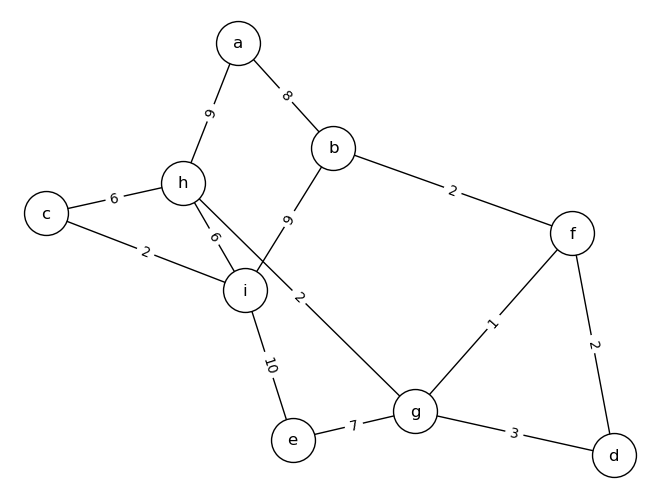

In [43]:
options = {"edgecolors": "black", "node_size": 1000, "node_color": "white"}
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, **options)
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
plt.show()

In [27]:
nx.diameter(g)

3

In [15]:
nx.shortest_path(g, "a", "g", weight='weight')

['a', 'h', 'g']

In [16]:
nx.shortest_path(g, "c", "f", weight='weight')

['c', 'h', 'g', 'f']

In [17]:
nx.shortest_path(g, "d", "i", weight='weight')

['d', 'g', 'h', 'i']

In [18]:
nx.clustering(g, "a")

0

In [19]:
nx.clustering(g, "f")

0.3333333333333333

In [20]:
nx.clustering(g, "d")

1.0

In [21]:
nx.closeness_centrality(g, "a", wf_improved=False), nx.closeness_centrality(g, "c", wf_improved=False), nx.closeness_centrality(g, "d", wf_improved=False)

(0.5, 0.5, 0.47058823529411764)

In [22]:
mat = nx.adjacency_matrix(g)
mat.todense()

matrix([[ 0,  8,  9,  0,  0,  0,  0,  0,  0],
        [ 8,  0,  0,  2,  9,  0,  0,  0,  0],
        [ 9,  0,  0,  0,  6,  6,  0,  2,  0],
        [ 0,  2,  0,  0,  0,  0,  2,  1,  0],
        [ 0,  9,  6,  0,  0,  2,  0,  0, 10],
        [ 0,  0,  6,  0,  2,  0,  0,  0,  0],
        [ 0,  0,  0,  2,  0,  0,  0,  3,  0],
        [ 0,  0,  2,  1,  0,  0,  3,  0,  7],
        [ 0,  0,  0,  0, 10,  0,  0,  7,  0]], dtype=int32)

## Exercise 4: Open Questions [4 points]
- Q1: What is the difference between a simplicion and an hyperedge?  
- Q2: What is the meaning of the parameter s in the s-analysis framework? 